In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as p
from scipy.stats import stats
from scipy.optimize import curve_fit
import scipy.optimize

### Without Feedback

In [49]:
#read csv files using panda
#use 'skiprows' to define data sets before and after the threshhold
h = p.read_csv('thresholdData.csv')
h_above = p.read_csv('thresholdData.csv', skiprows=[1,2,3])
h_below = p.read_csv('thresholdData.csv', skiprows=[i for i in range(5,15)])

In [37]:
#uncomment to view data table
#h
#h_above
#h_below

,mA,mW
0,7,0.03
1,8,0.04
2,9,0.05
3,10,0.08


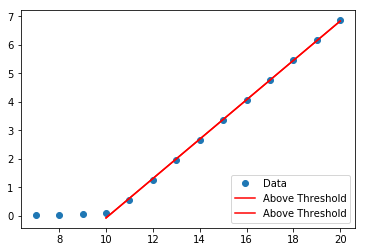

In [50]:
#plot data
plt.plot(h.mA, h.mW, 'o', label='Data')

#fit and pot a line above the threshhold
def test(x, m, b): 
    return m*x+b
param, param_cov = curve_fit(test, h_above.mA, h_above.mW)
plt.plot(h_above.mA, test(h_above.mA, *param), 'r', label = 'Above Threshold')

#fit and pot a line below the threshhold
def test2(x, m, b): 
    return m*x+b
param2, param_cov2 = curve_fit(test, h_below.mA, h_below.mW)
plt.plot(h_above.mA, test(h_above.mA, *param), 'r', label = 'Above Threshold')

plt.legend(loc='lower right')

Find intersection of fitted lines for lasing threshhold. 

In [44]:
def intersect(x):
    return test2(x, *param2) - test(x, *param)

print('Threshhold current = ', scipy.optimize.brentq(intersect, 8,12), 'mA')

Threshhold current =  10.226831896551724 mA


### With Feedback

In [45]:
#read csv files using panda
#use 'skiprows' to define data sets before and after the threshhold
f = p.read_csv('feedbackDataWithFeedback12.558.csv')
f_above = p.read_csv('feedbackDataWithFeedback12.558.csv', skiprows = [i for i in range(1,7)])
f_below =  p.read_csv('feedbackDataWithFeedback12.558.csv', skiprows = [i for i in range(8,14)])

In [51]:
#uncomment to view data table
#f
#f_above
#f_below

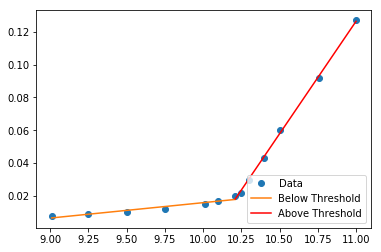

In [54]:
#plot data
plt.plot(f.mA, f.mW, 'o', label='Data')

#fit and pot a line above the threshhold
def test(x, m, b): 
    return m*x+b
param, param_cov = curve_fit(test, f_above.mA, f_above.mW, p0 = [0.1,0.03])
plt.plot(f_below.mA, test2(f_below.mA, *param2), label = 'Below Threshold')

#fit and pot a line below the threshhold
def test2(x, m, b): 
    return m*x+b
param2, param_cov2 = curve_fit(test, f_below.mA, f_below.mW)
plt.plot(f_above.mA, test(f_above.mA, *param), 'r', label = 'Above Threshold')

plt.legend(loc='lower right')

Find intersection of fitted lines for lasing threshhold. 

In [55]:
def intersect(x):
    return test2(x, *param2) - test(x, *param)

print('Threshhold current = ', scipy.optimize.brentq(intersect, 8,12), 'mA')

Threshhold current =  10.208070482404446 mA
